In [1]:
import pandas as pd
train = pd.read_csv('./input/digit-recognizer/train.csv')
test = pd.read_csv('./input/digit-recognizer/test.csv')

In [2]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [3]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [4]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [5]:
train.shape

(42000, 785)

In [6]:
df = train

train = df.sample(frac = 0.7, random_state = 0)
valid = df.drop(train.index)

print(train.shape)
print(valid.shape)

(29400, 785)
(12600, 785)


In [7]:
X_train = train
y_train = X_train.pop('label')

print(X_train.shape)
print(y_train.shape)

(29400, 784)
(29400,)


In [8]:
X_valid = valid
y_valid = X_valid.pop('label')

print(X_valid.shape)
print(y_valid.shape)

(12600, 784)
(12600,)


In [9]:
input_shape = [X_train.shape[1]]
print(input_shape)

[784]


In [10]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation = 'softmax'),
])

In [11]:
# 0.965
"""
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation = 'softmax'),
])
"""

"\nmodel = keras.Sequential([\n    layers.BatchNormalization(input_shape = input_shape),\n    layers.Dense(256, activation = 'relu'),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.Dense(10, activation = 'softmax'),\n])\n"

In [12]:
# 0.968
"""
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation = 'softmax'),
])
"""

"\nmodel = keras.Sequential([\n    layers.BatchNormalization(input_shape = input_shape),\n    layers.Dense(256, activation = 'relu'),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.Dense(256, activation = 'relu'),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.Dense(256, activation = 'relu'),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.Dense(10, activation = 'softmax'),\n])\n"

In [13]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [14]:
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 500,
    callbacks = [early_stopping],
    verbose = 0,
)

In [15]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.435630,0.869184,0.194276,0.946508
1,0.181544,0.944048,0.167870,0.957063
2,0.126965,0.959150,0.143358,0.965079
3,0.097101,0.968299,0.149927,0.965317
4,0.077166,0.974660,0.149076,0.968413


0.14335761964321136


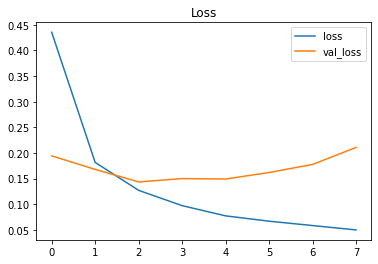

In [16]:
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss')
print(history_df.val_loss.min())

0.9697619080543518


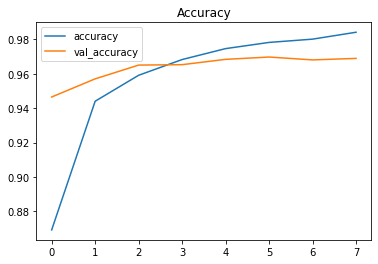

In [17]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy')
print(history_df.val_accuracy.max())

In [18]:
import numpy as np

predictions = model.predict(X_train)

print(list(map(np.argmax, predictions[:5])))
print(y_train[:5])

[3, 6, 9, 5, 6]
16275    3
19204    6
18518    9
25780    5
16228    6
Name: label, dtype: int64


In [19]:
predictions = model.predict(test)

y_test = list(map(np.argmax, predictions))
output = pd.DataFrame({'ImageId': range(1, len(y_test)+1), 'Label': y_test})

In [20]:
output.to_csv("dl_submission.csv", index = False)

# Reference

[Kaggle - Intro to Deep Learning - Dropout and Batch Normalization](https://www.kaggle.com/ryanholbrook/dropout-and-batch-normalization)

[Kaggle - Intro to Deep Learning - Binary Classification](https://www.kaggle.com/ryanholbrook/binary-classification)

[Tensorflow - Tutorial - Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)

[UD187 - Lesson 3: Your First Model - Fashion MNIST](https://classroom.udacity.com/courses/ud187/lessons)